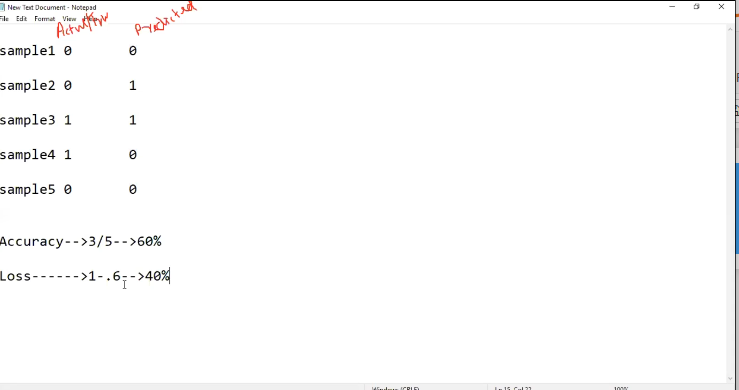

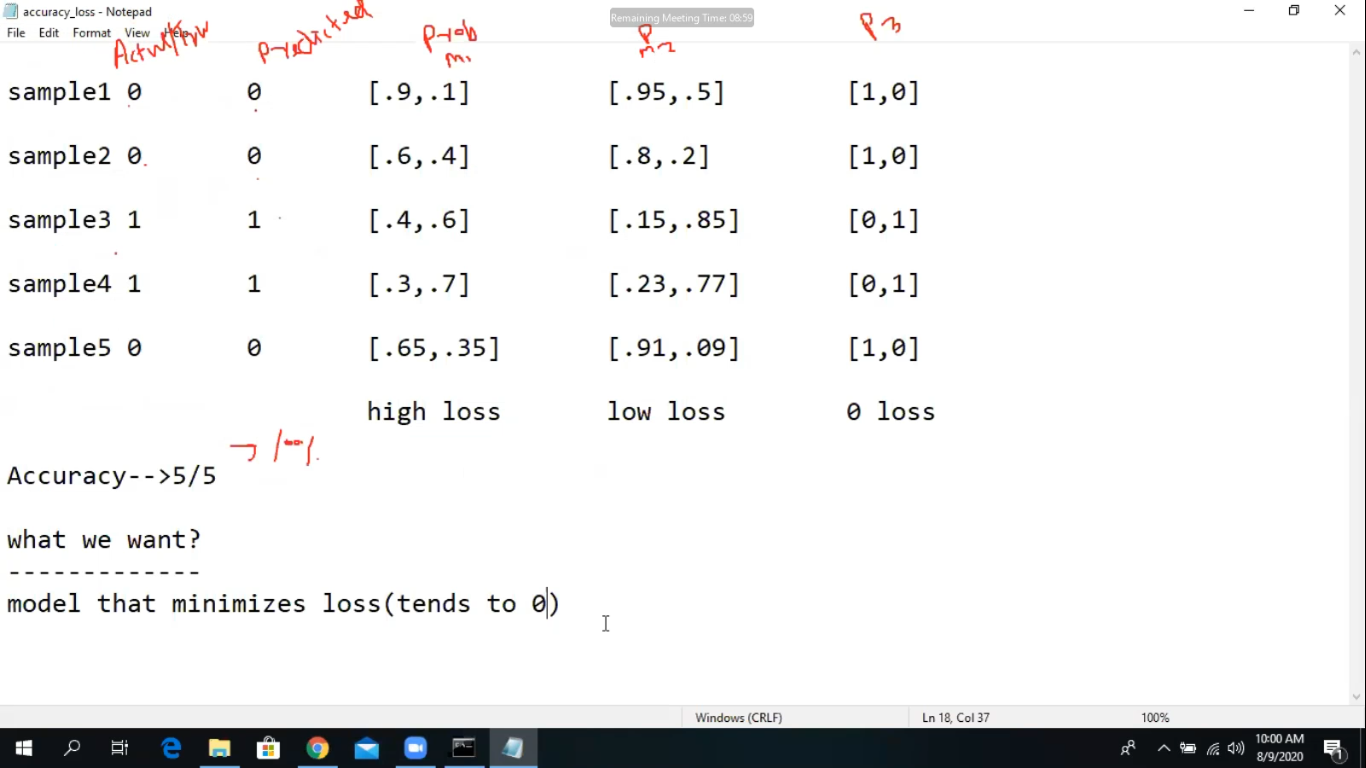

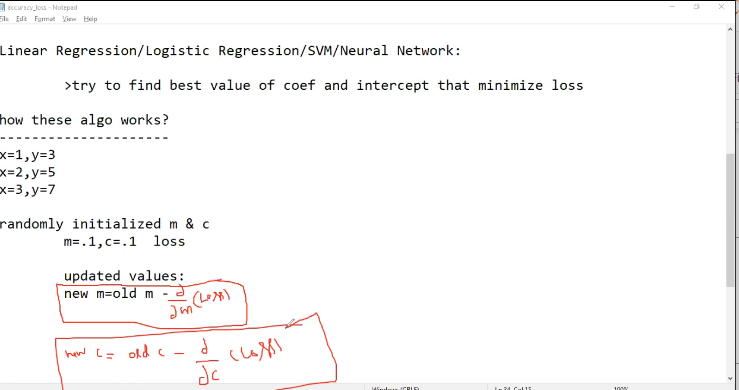

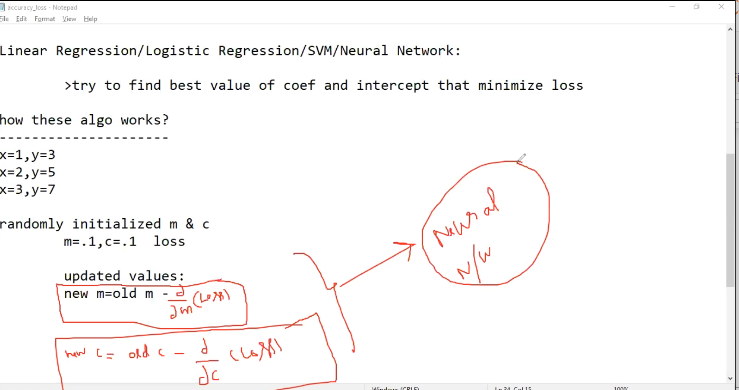

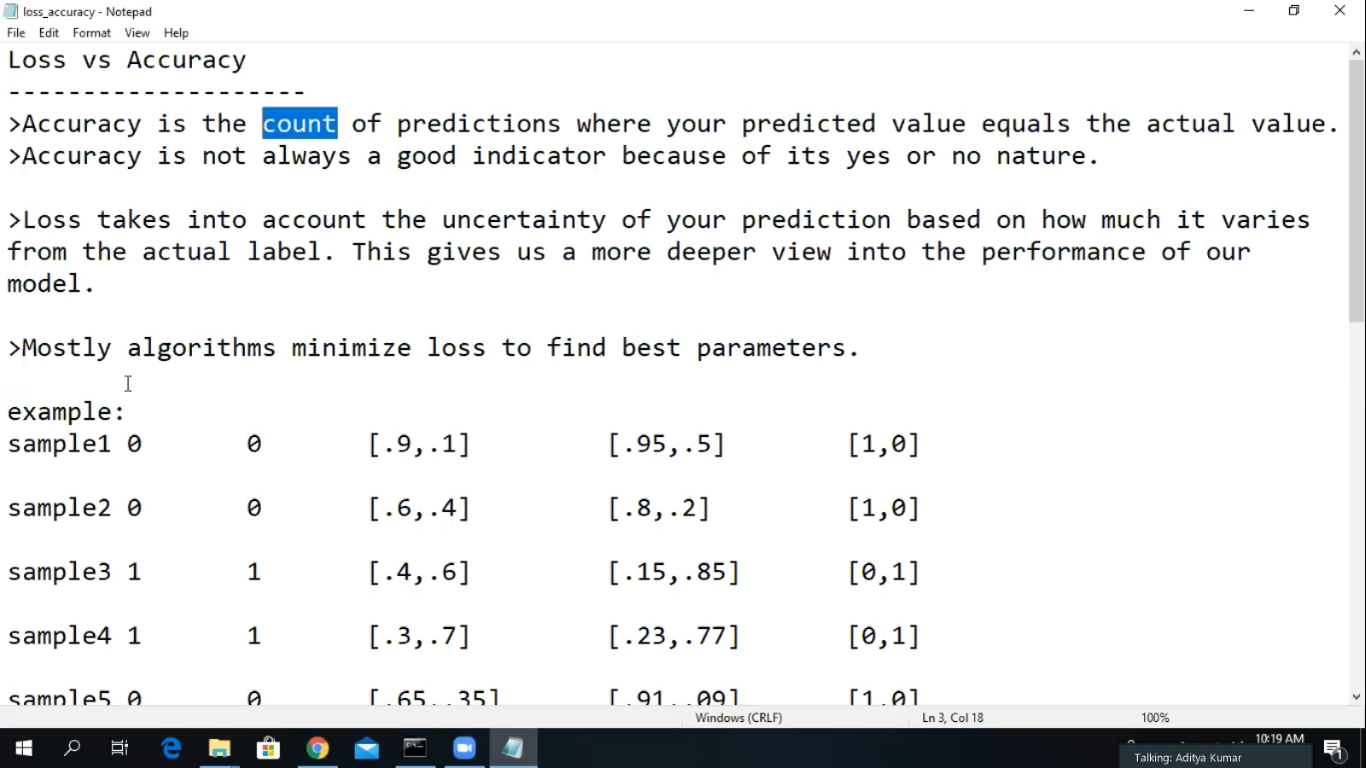

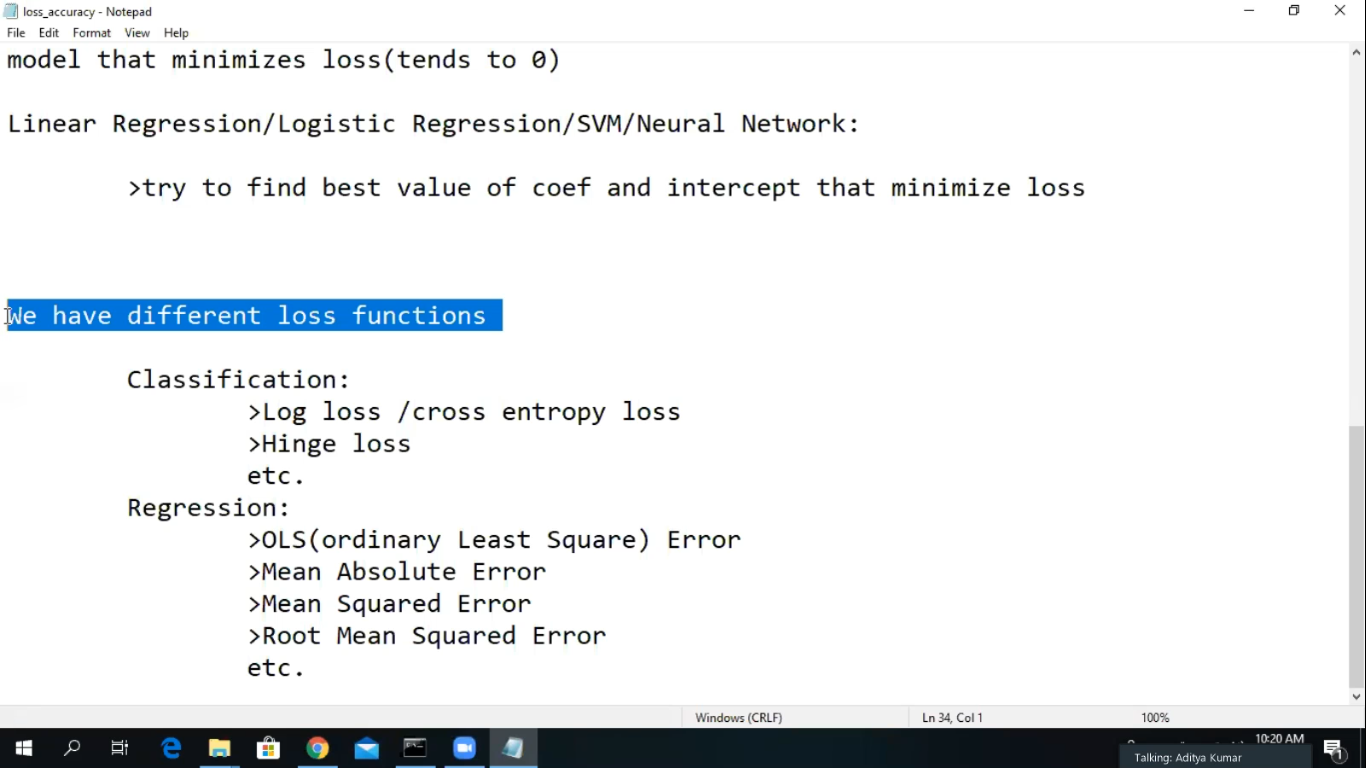

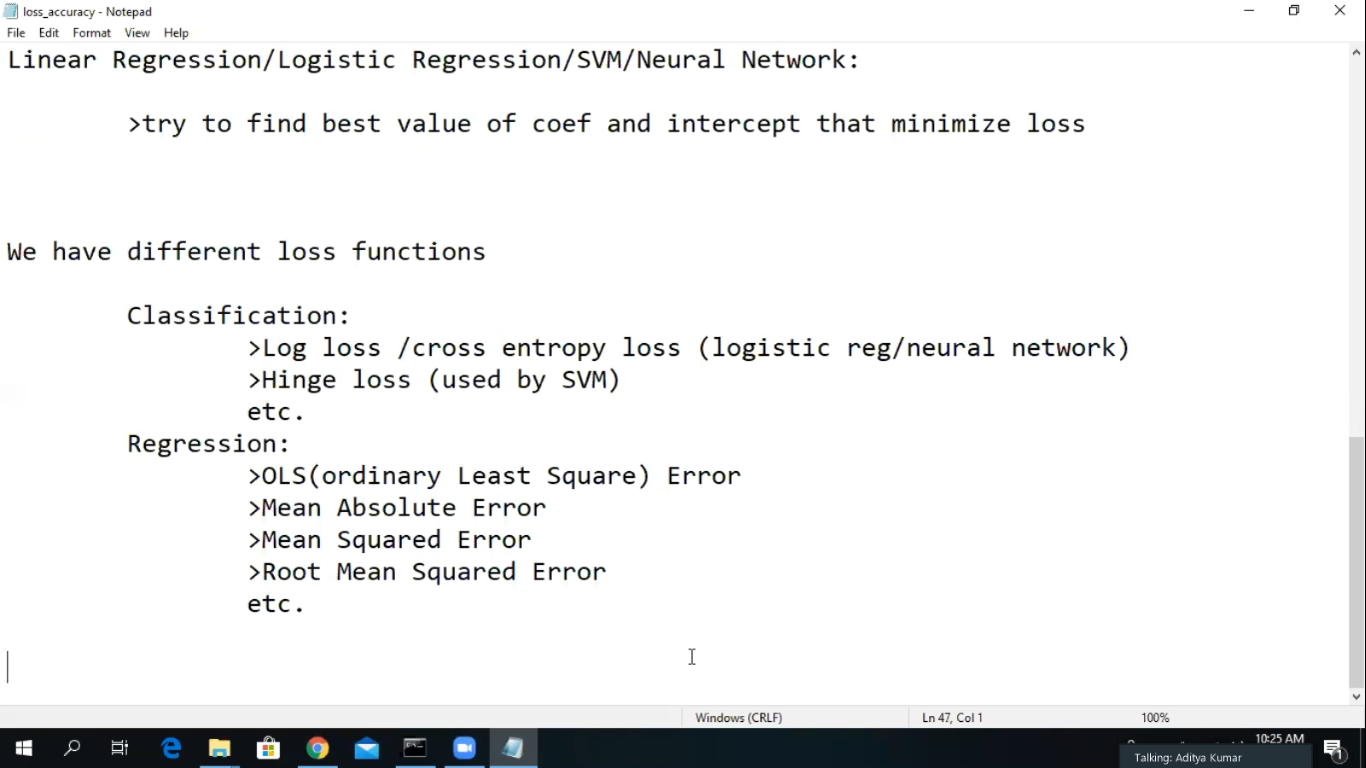

In [67]:
import pandas as pd
from sklearn.metrics import accuracy_score,classification_report,log_loss
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler

In [68]:
df = pd.read_csv('/home/echelon/machine_learning_personal/machine learning/dataset/classification/fruits.csv') 
df.FruitName = df.FruitName.map({'Apple':0,'Banana':1})
X = df.iloc[:,:-1]
y = df.iloc[:,-1] 
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=10) 

# Normalisation/scaling

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) #thora bahut hi effect aaya hai scaling ka 
# ------------------------------------------------
log = LogisticRegression()
log.fit(X_train,y_train)
pred_train = log.predict(X_train) 
pred_test = log.predict(X_test)
print(f'accuracy at training data : {accuracy_score(y_train,pred_train)}')
print(f'accuracy at training data : {accuracy_score(y_test,pred_test)}')

probs_training = log.predict_proba(X_train)
probs_testing = log.predict_proba(X_test)


print(probs_training.ndim)

print(f'Training loss : {log_loss(y_train,probs_training)}')# yhan pe logg_loss automatically binary classification aur multiclass classification loss nikal leta hai
print(f'Training loss : {log_loss(y_test,probs_testing)}')# logg_loss are also known as cross-entropy loss

accuracy at training data : 1.0
accuracy at training data : 0.6666666666666666
2
Training loss : 0.11340211493379
Training loss : 1.1541833539900748


# hamar model vo achcha hai jiska logg_loss kam hai

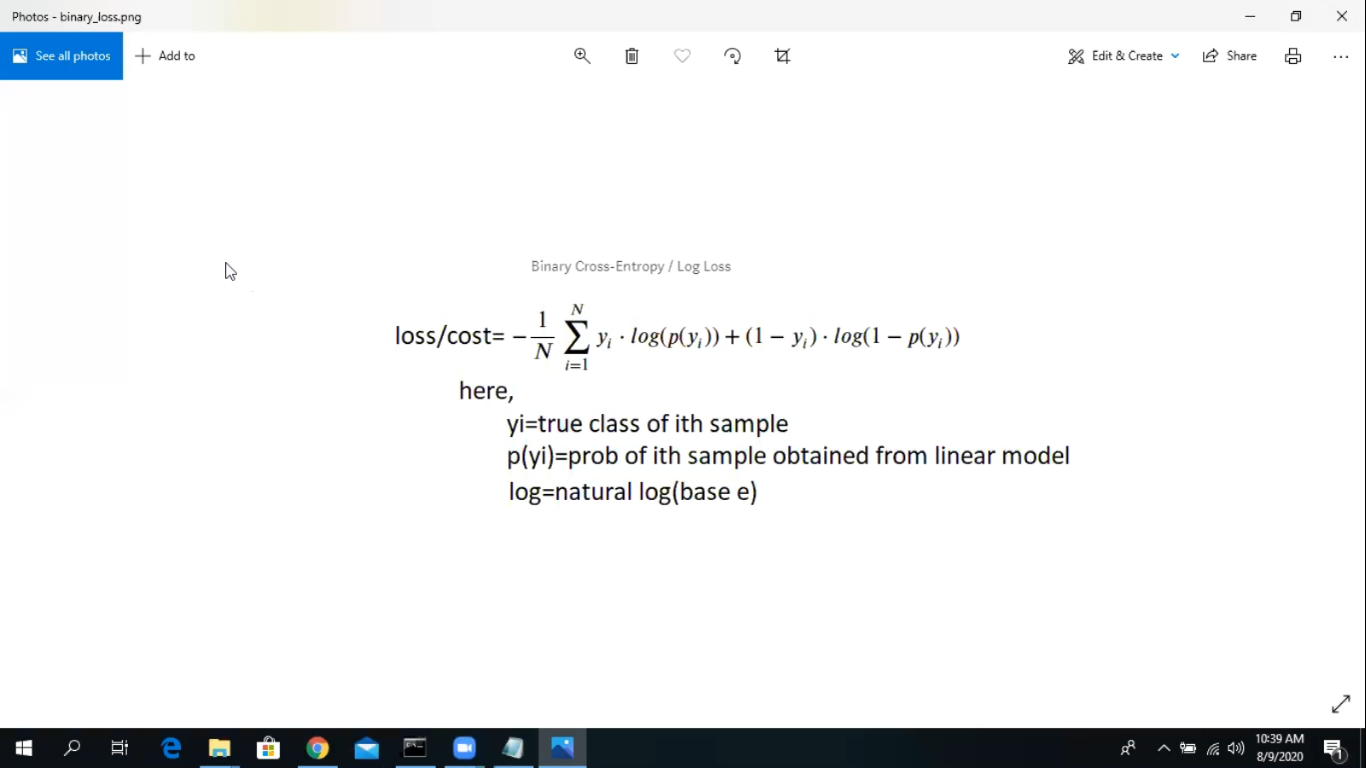

# How log loss is calculated

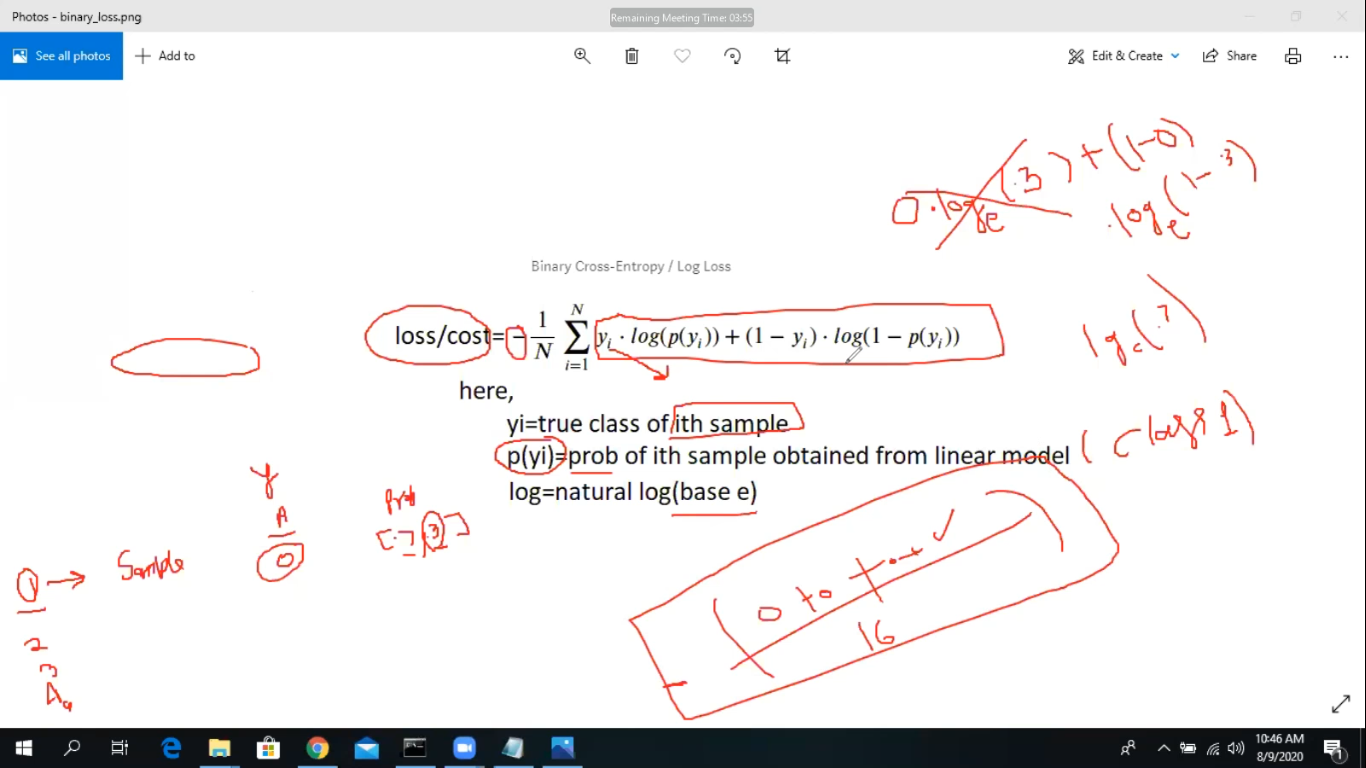

# r2_score() apne ander se loss ko call krta hai

## loss compute krne ke liye y ka sahara liya jata hai features ki nhi

In [69]:
df = pd.read_csv('/home/echelon/machine_learning_personal/machine learning/dataset/regression/salary_1_variable.csv') 
df


YearsExperience  Salary
0               1.1   39343
1               1.3   46205
2               1.5   37731
3               2.0   43525
4               2.2   39891
5               2.9   56642
6               3.0   60150
7               3.2   54445
8               3.2   64445
9               3.7   57189
10              3.9   63218
11              4.0   55794
12              4.0   56957
13              4.1   57081
14              4.5   61111
15              4.9   67938
16              5.1   66029
17              5.3   83088
18              5.9   81363
19              6.0   93940
20              6.8   91738
21              7.1   98273
22              7.9  101302
23              8.2  113812
24              8.7  109431
25              9.0  105582
26              9.5  116969
27              9.6  112635
28             10.3  122391
29             10.5  121872

In [70]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [71]:
from sklearn.linear_model import LinearRegression 
lr = LinearRegression() 
lr.fit(X,y) 
yhat = lr.predict(X) 

In [72]:
y

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872])

In [73]:
yhat

array([ 36187.15875227,  38077.15121656,  39967.14368085,  44692.12484158,
        46582.11730587,  53197.09093089,  54142.08716303,  56032.07962732,
        56032.07962732,  60757.06078805,  62647.05325234,  63592.04948449,
        63592.04948449,  64537.04571663,  68317.03064522,  72097.0155738 ,
        73987.00803809,  75877.00050238,  81546.97789525,  82491.9741274 ,
        90051.94398456,  92886.932681  , 100446.90253816, 103281.8912346 ,
       108006.87239533, 110841.86109176, 115566.84225249, 116511.83848464,
       123126.81210966, 125016.80457395])

# idividual sample ke loss ko residual kehte hain regression me

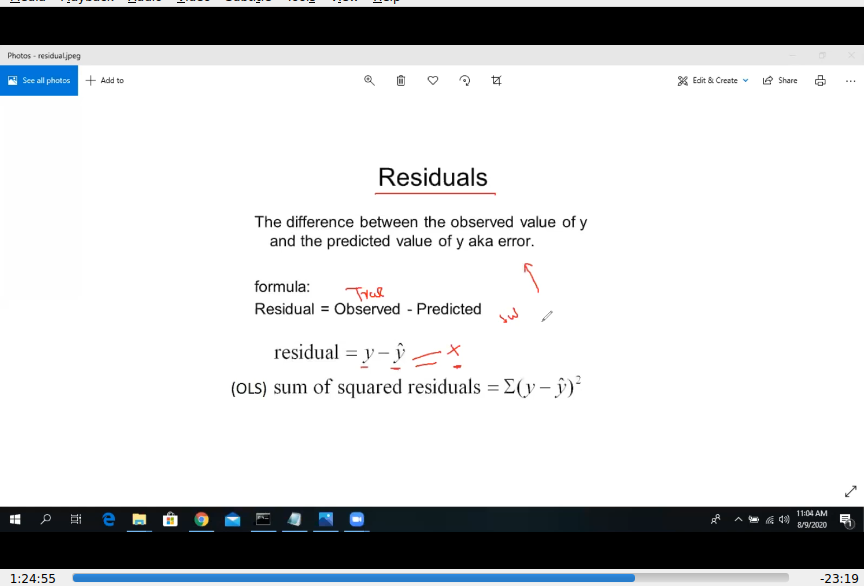

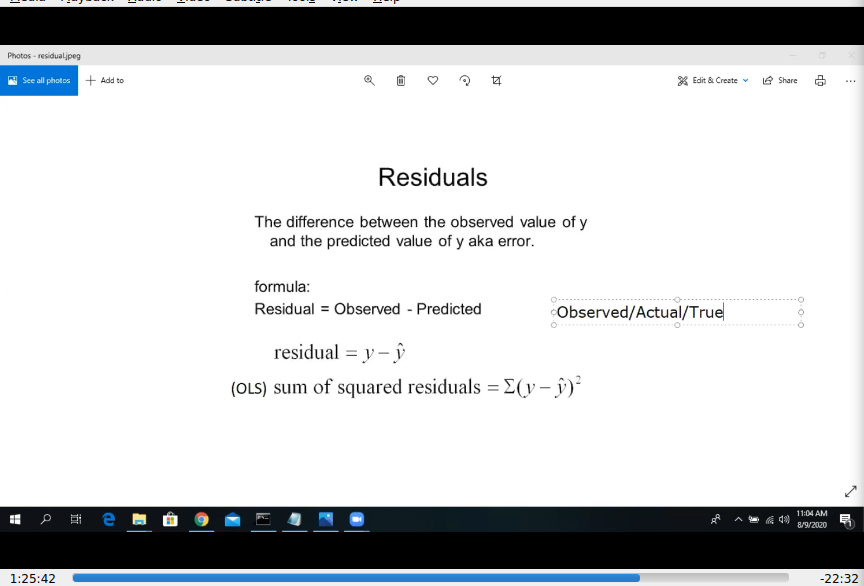

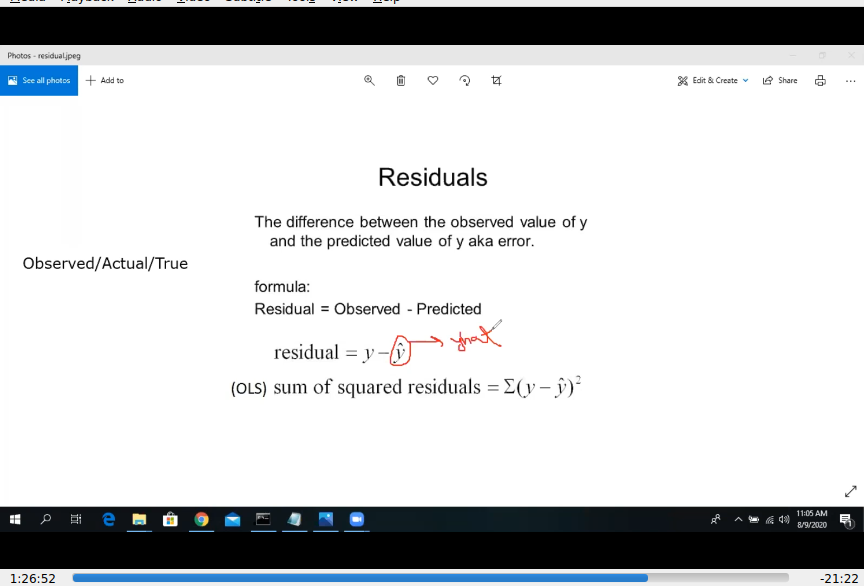

In [74]:
residual = y-yhat # <----- residual of each sample
print(residual)

[ 3155.84124773  8127.84878344 -2236.14368085 -1167.12484158
 -6691.11730587  3444.90906911  6007.91283697 -1587.07962732
  8412.92037268 -3568.06078805   570.94674766 -7798.04948449
 -6635.04948449 -7456.04571663 -7206.03064522 -4159.0155738
 -7958.00803809  7210.99949762  -183.97789525 11448.0258726
  1686.05601544  5386.067319     855.09746184 10530.1087654
  1424.12760467 -5259.86109176  1402.15774751 -3876.83848464
  -735.81210966 -3144.80457395]


 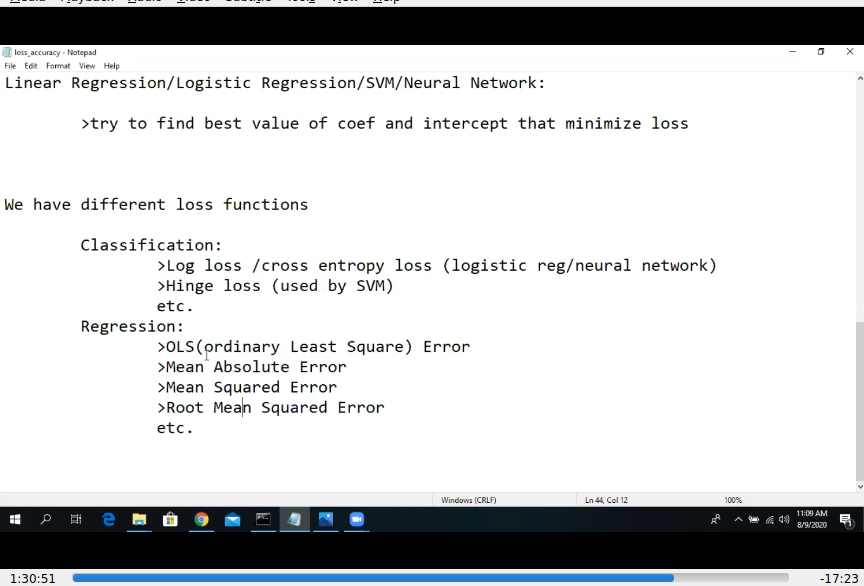

In [75]:
import numpy as np

In [76]:
ols = np.sum(np.square(residual)) # first way to calcualte the loss for regression problem
ols

938128551.668429

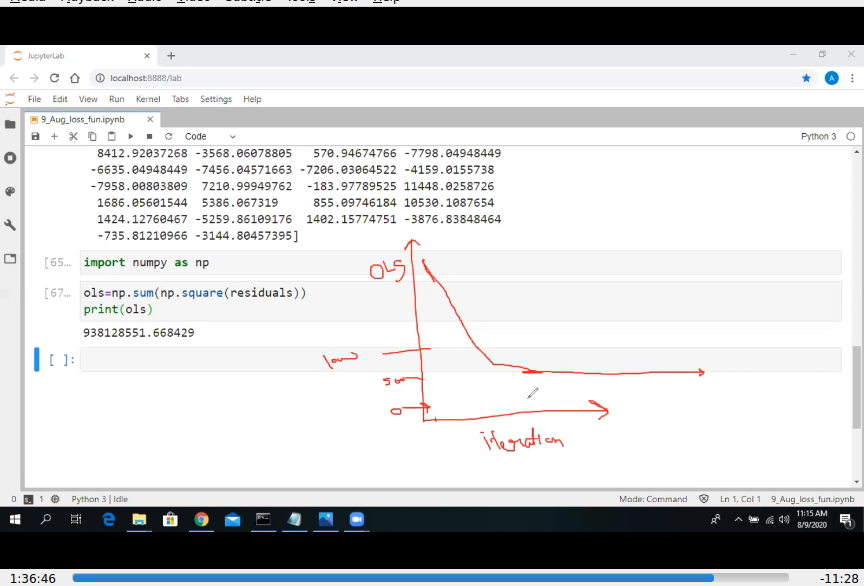

# linear-regression kis loss ko minimize krta hai : ols 

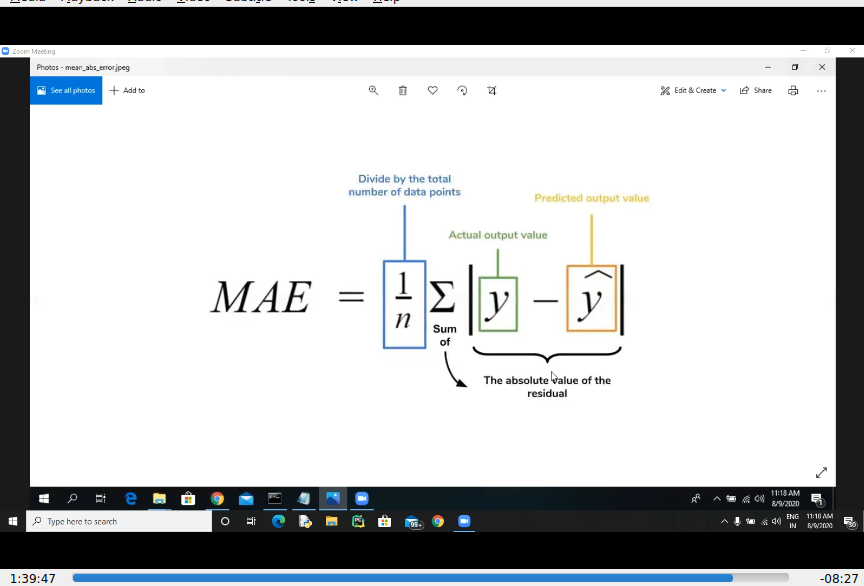

In [77]:
mae = np.mean(abs(y-yhat))# esi bahut si algorithm hai jo mae ko minimize krti hain
mae

4644.2012894435375

In [78]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y,yhat)

4644.2012894435375

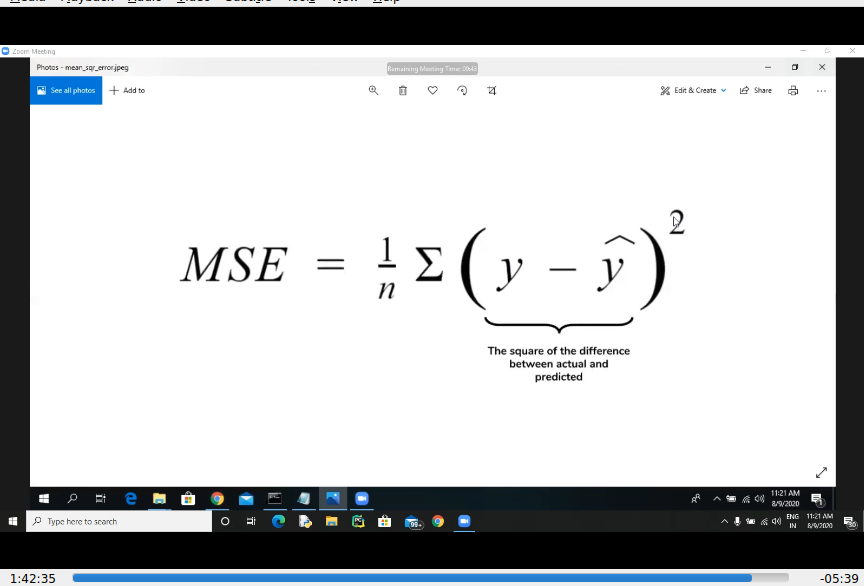

In [79]:
mse = np.mean(np.square(y-yhat))
mse

31270951.722280968

In [80]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(y,yhat)

31270951.722280968

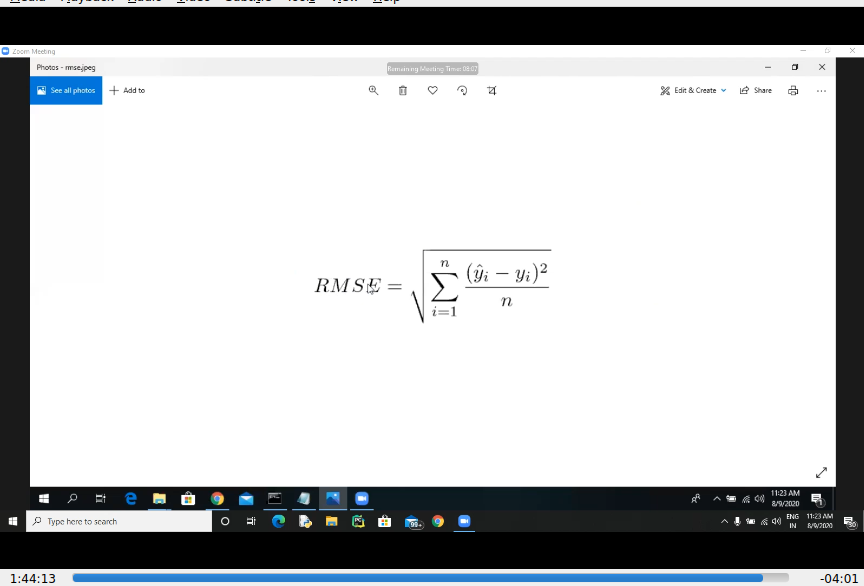

In [81]:
rmse = np.sqrt(mse)
rmse

5592.043608760662

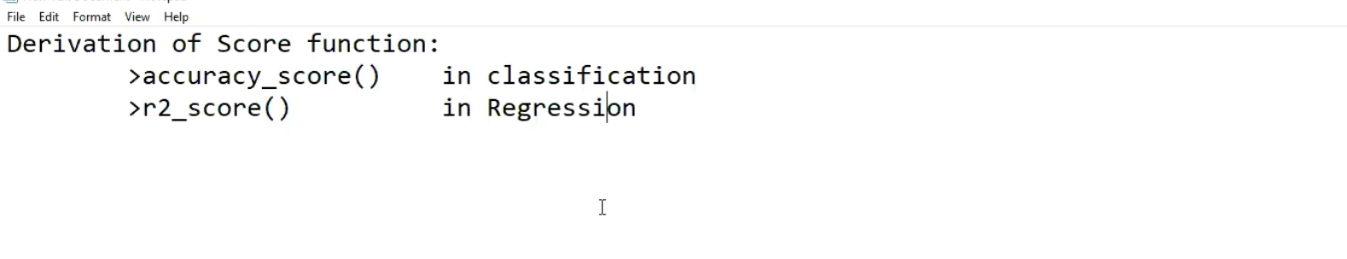

# Derivation of r2_score()

In [83]:
import pandas as pd 
from sklearn.linear_model import LinearRegression

In [84]:
df = pd.read_csv('/home/echelon/machine_learning_personal/machine learning/dataset/regression/salary_1_variable.csv') 
df


YearsExperience  Salary
0               1.1   39343
1               1.3   46205
2               1.5   37731
3               2.0   43525
4               2.2   39891
5               2.9   56642
6               3.0   60150
7               3.2   54445
8               3.2   64445
9               3.7   57189
10              3.9   63218
11              4.0   55794
12              4.0   56957
13              4.1   57081
14              4.5   61111
15              4.9   67938
16              5.1   66029
17              5.3   83088
18              5.9   81363
19              6.0   93940
20              6.8   91738
21              7.1   98273
22              7.9  101302
23              8.2  113812
24              8.7  109431
25              9.0  105582
26              9.5  116969
27              9.6  112635
28             10.3  122391
29             10.5  121872

In [86]:
X = df.iloc[:,:-1].values 
y = df.iloc[:,-1].values 

lr = LinearRegression() 
lr.fit(X,y)  
yhat = lr.predict(X)

In [87]:
y

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872])

In [88]:
yhat

array([ 36187.15875227,  38077.15121656,  39967.14368085,  44692.12484158,
        46582.11730587,  53197.09093089,  54142.08716303,  56032.07962732,
        56032.07962732,  60757.06078805,  62647.05325234,  63592.04948449,
        63592.04948449,  64537.04571663,  68317.03064522,  72097.0155738 ,
        73987.00803809,  75877.00050238,  81546.97789525,  82491.9741274 ,
        90051.94398456,  92886.932681  , 100446.90253816, 103281.8912346 ,
       108006.87239533, 110841.86109176, 115566.84225249, 116511.83848464,
       123126.81210966, 125016.80457395])

In [96]:
se_yhat = np.sum(np.square(y-yhat))
se_yhat

938128551.668429

In [97]:
y_mean = np.mean(y)
y_mean

76003.0

In [98]:
se_mean = np.sum(np.square(y-y_mean))
se_mean

21794977852.0

In [99]:
r2 = (1 - (se_yhat/se_mean))
r2

0.9569566641435086

In [100]:
from sklearn.metrics import r2_score
r2_score(y,yhat)

0.9569566641435086

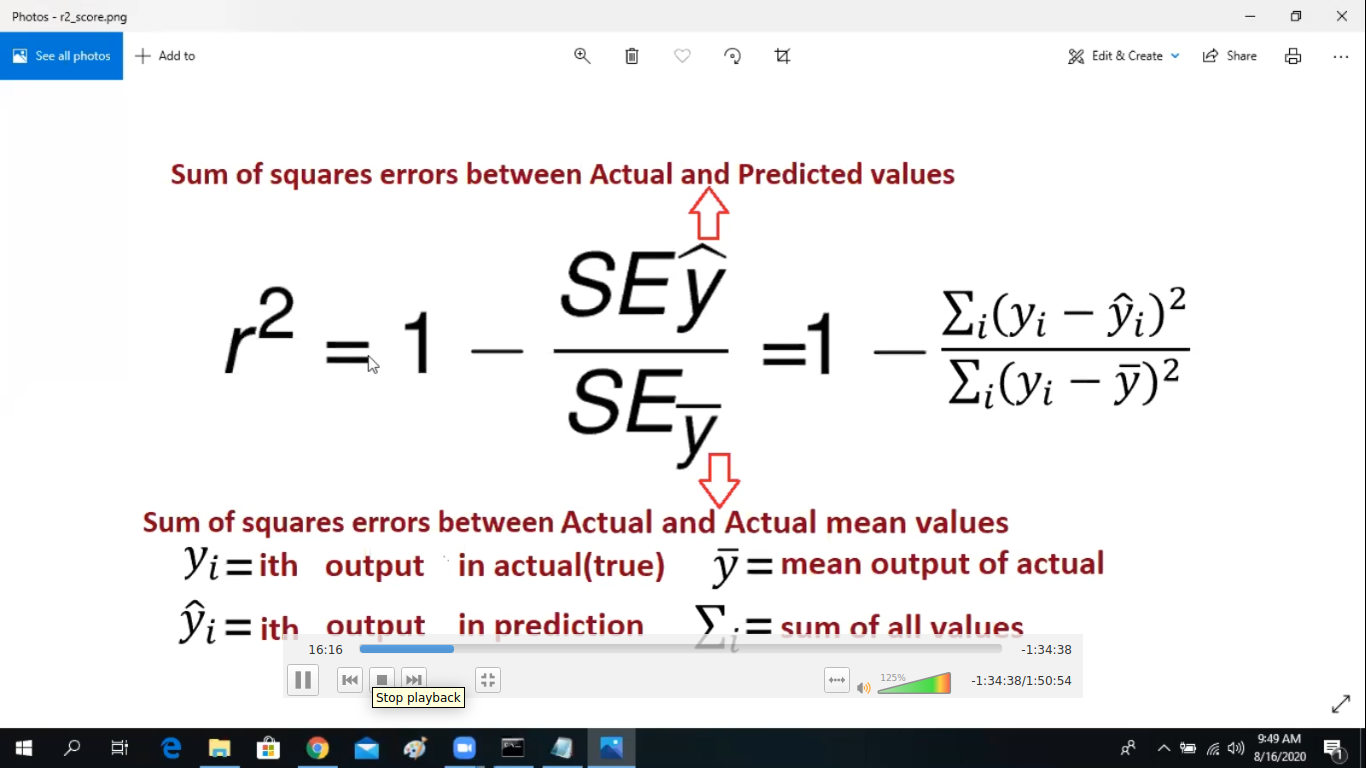

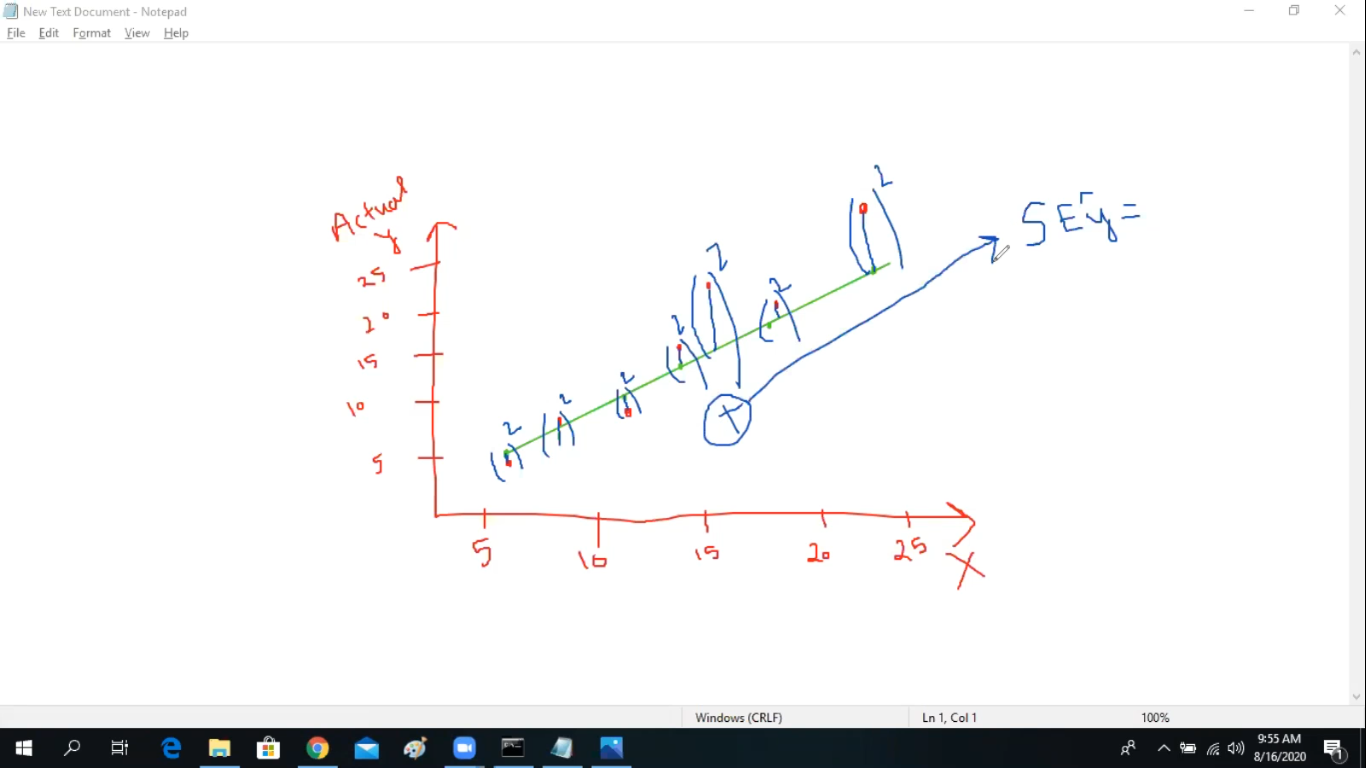

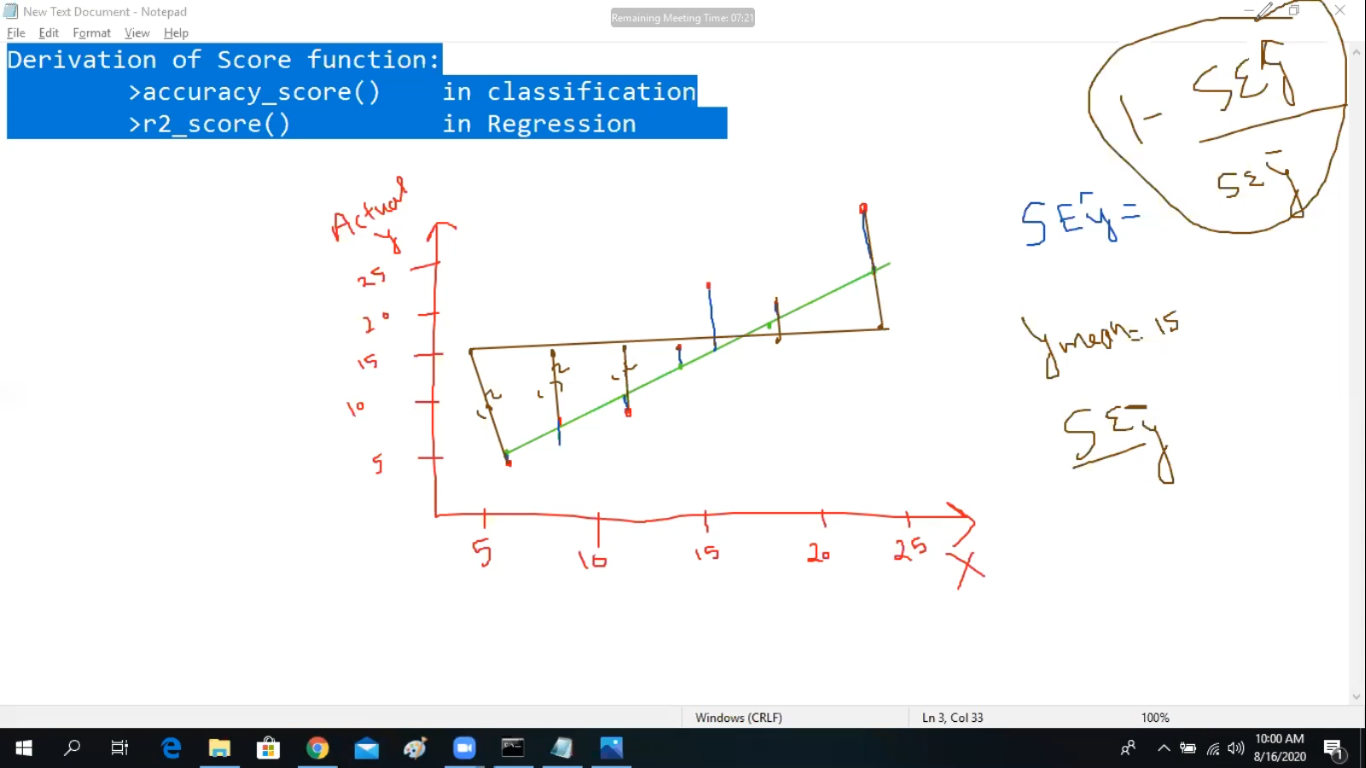